/var/folders/1b/r7bj9kwn3wbf8n_h5chpmjjr0000gn/T/ipykernel_3112/4001507188.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True) # Handle missing values


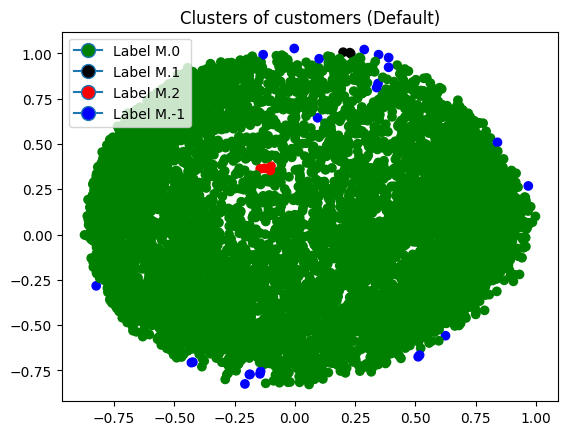

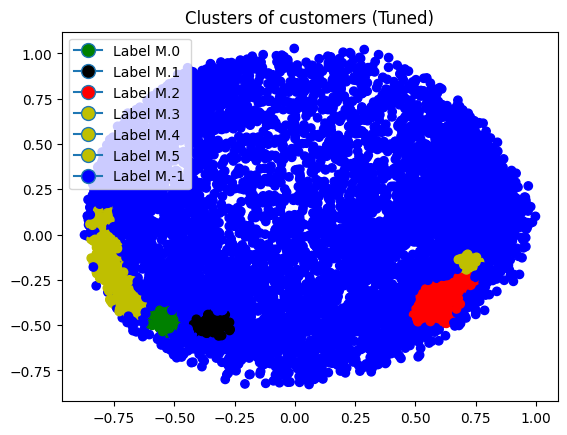

In [43]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

def load_data(file_path):
    data = pd.read_csv(file_path)
    
    data = data.drop('CUST_ID', axis=1)       # Drop the 'CUST_ID' column
    
    data.fillna(method='ffill', inplace=True) # Handle missing values
    
    # print(data.head())
    return data

def scale_normalize(data):
    # Step 3: Scale and normalize the data
    scaler          = StandardScaler()
    scaled_data     = scaler.fit_transform(data)
    normalized_data = normalize(scaled_data)
    normalized_data = pd.DataFrame(normalized_data)
    return normalized_data

def apply_pca(normalized_data, n_components=2):
    # Step 4: Apply PCA
    pca            = PCA(n_components=n_components)
    principal_data = pca.fit_transform(normalized_data)
    principal_data = pd.DataFrame(principal_data, columns=['C1', 'C2'])
    # print(principal_data.head())
    return principal_data

def apply_dbscan(data, eps, min_samples):
    # Step 5: Apply DBSCAN
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = dbscan_model.labels_
    return labels

def visualize_clusters(data, labels, title, x_label, y_label):
    # Step 6 and 8: Visualize Clusters
    colors        = {0: 'g', 1: 'k', 2: 'r', -1: 'b'}
    default_color = 'y'  # Set a default color for unknown labels
    
    cvec = [colors.get(label, default_color) for label in labels]

    # plt.figure(figsize=(9, 9))
    plt.scatter(data[x_label], data[y_label], c=cvec)
    plt.title(title)

    # Build the legend dynamically
    legend_labels  = {label: f'Label M.{label}' for label in set(labels)}
    
    legend_handles = [plt.Line2D([0], 
                                 [0], 
                                 marker='o', 
                                 markerfacecolor=colors.get(label, default_color), 
                                 markersize=10, 
                                 label=legend_labels[label]) 
                      for label in set(labels)]

    # Add legend to the plot
    plt.legend(handles=legend_handles, loc='upper left', fontsize=10)

    # Show the visualization
    plt.show()


# Step 1: Load libraries
file_path = 'Dataset_9.csv'

# Step 2: Load the data
data = load_data(file_path)

# Step 3: Scale and normalize the data
normalized_data = scale_normalize(data)

# Step 4: Apply PCA
principal_data = apply_pca(normalized_data)

# Step 5: Apply DBSCAN
labels_default = apply_dbscan(principal_data, eps=0.0375, min_samples=3)

# Step 6: Visualize Clusters (Default)
visualize_clusters(principal_data, labels_default, 'Clusters of customers (Default)', 'C1', 'C2')

# Step 7: Apply DBSCAN with tuned parameters
labels_tuned = apply_dbscan(principal_data, eps=0.0375, min_samples=50)

# Step 8: Visualize Clusters (Tuned)
visualize_clusters(principal_data, labels_tuned, 'Clusters of customers (Tuned)', 'C1', 'C2')
